Dear Prof. Graves this Notebook is to express my confusion within our class on Jan 21st. Below outlines my confusion. In class we investigate a collider problem wherein it introduces a paradox. Attached would be our class diagram.

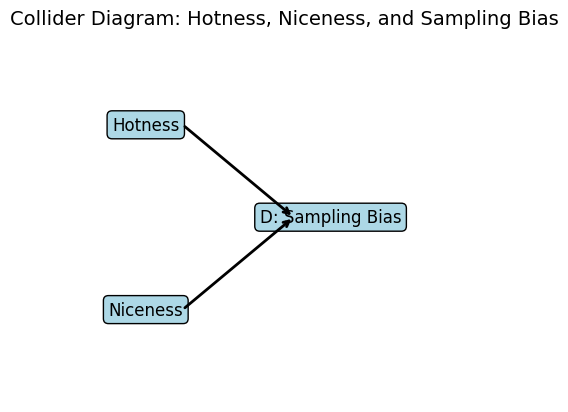

In [227]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Define node positions and labels
positions = {
    'A': (0, 1),   # Hotness
    'B': (0, 0),   # Niceness
    'C': (1, 0.5)  # Sampling Bias
}
node_labels = {
    'A': 'Hotness',
    'B': 'Niceness',
    'C': 'D: Sampling Bias'
}

# Draw nodes
for node, (x, y) in positions.items():
    ax.text(x, y, node_labels[node], fontsize=12, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue'))

# Draw arrows from A and B to C
edges = [('A', 'C'), ('B', 'C')]
for edge in edges:
    x_start, y_start = positions[edge[0]]
    x_end, y_end = positions[edge[1]]

    # Adjust the arrow start and end positions to be outside the edges of the boxes
    if edge[0] == 'A':
        arrow_start = (x_start + 0.2, y_start)  # Move right of A's box
    elif edge[0] == 'B':
        arrow_start = (x_start + 0.2, y_start)  # Move right of B's box
    else:
        arrow_start = (x_start, y_start)

    arrow_end = (x_end - 0.2, y_end)  # Move left of C's box

    # Add arrows to indicate direction
    arrowprops = dict(arrowstyle='->', color='black', lw=2)
    ax.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=arrowprops)

# Set limits and aspect
ax.set_xlim(-0.5, 2)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

# Show the plot
plt.title('Collider Diagram: Hotness, Niceness, and Sampling Bias', fontsize=14)
plt.show()

The topic of investigation would be the statement All hot guys/people are mean. Due the the collider on the sampling bias. We mentioned it was biased.
My confusion stems from the fact, that having this collider does not necessarily mean bias. Below I will illustrate why this is the case.

Below is a graph of hotness to niceness with uniform distribution. We see the mean/median=5, with random sampling. 

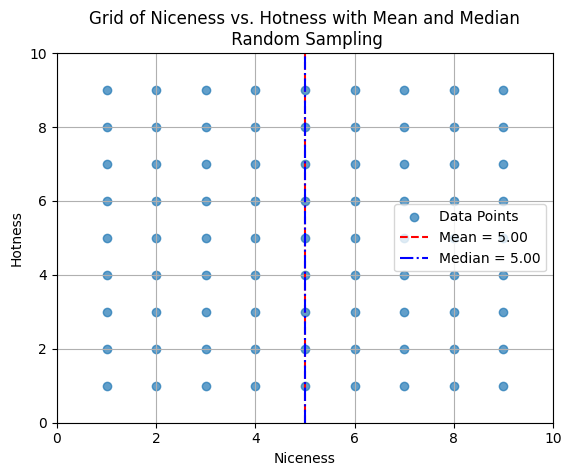

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the range for hotness and niceness
range_values = np.arange(1, 10)  # Values from 1 to 10

# Generate the grid
hotness, niceness = np.meshgrid(range_values, range_values)

# Flatten the grid into a list of points
data = {
    'hotness': hotness.flatten(),
    'niceness': niceness.flatten()
}

# Create the DataFrame
df = pd.DataFrame(data)

# Calculate mean and median of the niceness column
mean_niceness = df['niceness'].mean()
median_niceness = df['niceness'].median()

# Create the scatter plot with switched axes
plt.scatter(df['niceness'], df['hotness'], alpha=0.7, label='Data Points')
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\n Random Sampling')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


Now suppose we have a utility tradeoff. We see now because of our tradeoff. Our mean/median is now greater than 5. We see from here that with the tradeoff applied in fact the niceness increases. Suppose that this utility tradeoff represents our dating preferences, we see because of our dating preferences we have achieved a higher overall niceness. It now can be argued that because of our sampling bias we can now say all hot people are nice, which is opposite different from all hot people are mean. 

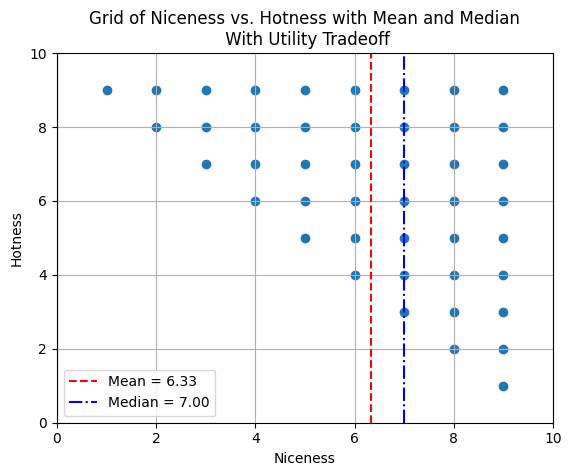

In [229]:
import numpy as np
import pandas as pd

def filter_above_line(df, x1=0, y1=9, x2=9, y2=0):
    """
    Filters the DataFrame to keep points above the line defined by (x1, y1) and (x2, y2).

    Parameters:
        df (pd.DataFrame): DataFrame containing 'hotness' and 'niceness' columns.
        x1, y1 (int): Coordinates of the first point on the line.
        x2, y2 (int): Coordinates of the second point on the line.

    Returns:
        pd.DataFrame: Filtered DataFrame with points above the line.
    """
    # Calculate the slope and intercept of the line
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1

    # Keep points where niceness > slope * hotness + intercept
    return df[df['niceness'] > slope * df['hotness'] + intercept]

# Filter the DataFrame
one_to_one_df = filter_above_line(df)

# Calculate mean and median of the niceness column
mean_niceness = one_to_one_df['niceness'].mean()
median_niceness = one_to_one_df['niceness'].median()

# Filter the DataFrame
one_to_one_df = filter_above_line(df)
one_to_one_df

# Create the scatter plot with switched axes
plt.scatter(one_to_one_df['niceness'], one_to_one_df['hotness'])
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\n With Utility Tradeoff')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

To further illustrate my point, suppose we have a purely superficial person, wherein anyone above a 7 in hotness they will date. We see from this that the mean/median niceness =5 which is the same as the random sampling without preferences from the first graph. We see in this example that the superficial preference did not in fact introduce bias in our hot people are mean investigation. 

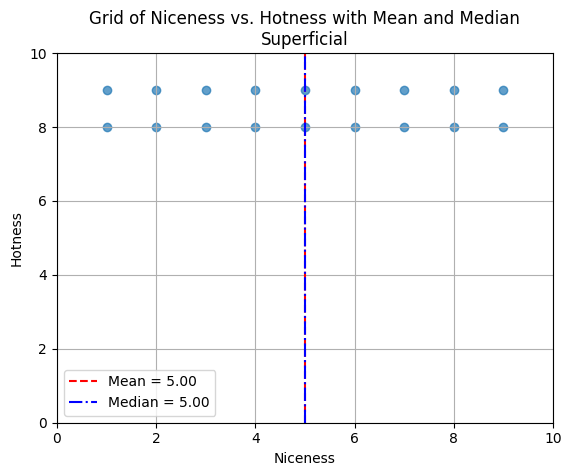

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def filter_above_threshold(df, threshold=7):
    """
    Filters the DataFrame to keep points where 'niceness' is above a given threshold.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'hotness' and 'niceness' columns.
        threshold (float): Threshold for filtering 'niceness'.

    Returns:
        pd.DataFrame: Filtered DataFrame with points above the threshold.
    """
    return df[df['hotness'] > threshold]


# Filter the DataFrame
superficial_df = filter_above_threshold(df, threshold=7)

# Calculate mean and median of the 'niceness' column
mean_niceness = superficial_df['niceness'].mean()
median_niceness = superficial_df['niceness'].median()

# Create the scatter plot with switched axes
plt.scatter(superficial_df['niceness'], superficial_df['hotness'], alpha=0.7)
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\nSuperficial')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


Overall, I have now introduced two things. I have introduced an explanation in my confusion on how the hot people are mean statement was derived. Secondly, I have also introduced a scenario wherein we have a superficial sampling bias that introduces no bias in our results (hot people are mean). Thank you for the time looking forward to hear your thoughts

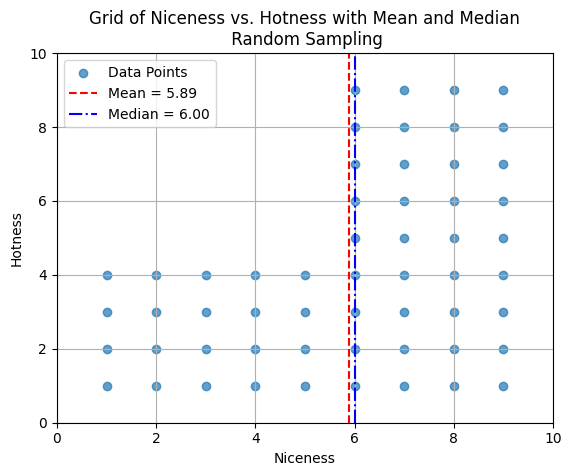

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the range for hotness and niceness
range_values = np.arange(1, 10)  # Values from 1 to 10

# Generate the grid
hotness, niceness = np.meshgrid(range_values, range_values)

# Flatten the grid into a list of points
data = {
    'hotness': hotness.flatten(),
    'niceness': niceness.flatten()
}

# Create the DataFrame
df = pd.DataFrame(data)


# Remove data points in the top left quadrant
df = df[~((df['hotness'] >= 5) & (df['niceness'] <= 5))]
# Calculate mean and median of the niceness column
mean_niceness = df['niceness'].mean()
median_niceness = df['niceness'].median()
# Create the scatter plot with switched axes
plt.scatter(df['niceness'], df['hotness'], alpha=0.7, label='Data Points')
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\n Random Sampling')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


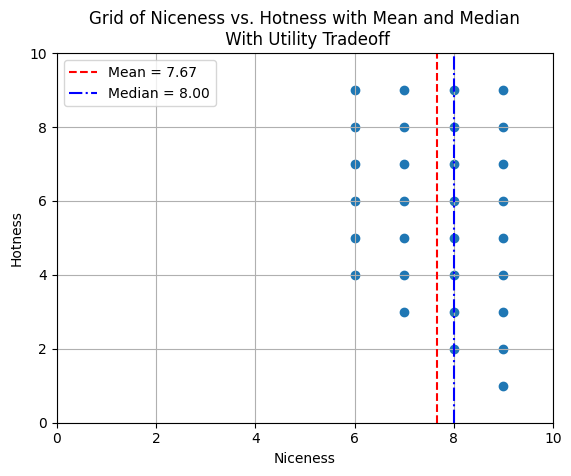

In [232]:
import numpy as np
import pandas as pd

def filter_above_line(df, x1=0, y1=9, x2=9, y2=0):
    """
    Filters the DataFrame to keep points above the line defined by (x1, y1) and (x2, y2).

    Parameters:
        df (pd.DataFrame): DataFrame containing 'hotness' and 'niceness' columns.
        x1, y1 (int): Coordinates of the first point on the line.
        x2, y2 (int): Coordinates of the second point on the line.

    Returns:
        pd.DataFrame: Filtered DataFrame with points above the line.
    """
    # Calculate the slope and intercept of the line
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1

    # Keep points where niceness > slope * hotness + intercept
    return df[df['niceness'] > slope * df['hotness'] + intercept]

# Filter the DataFrame
one_to_one_df = filter_above_line(df)

# Calculate mean and median of the niceness column
mean_niceness = one_to_one_df['niceness'].mean()
median_niceness = one_to_one_df['niceness'].median()

# Filter the DataFrame
one_to_one_df = filter_above_line(df)
one_to_one_df

# Create the scatter plot with switched axes
plt.scatter(one_to_one_df['niceness'], one_to_one_df['hotness'])
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\n With Utility Tradeoff')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

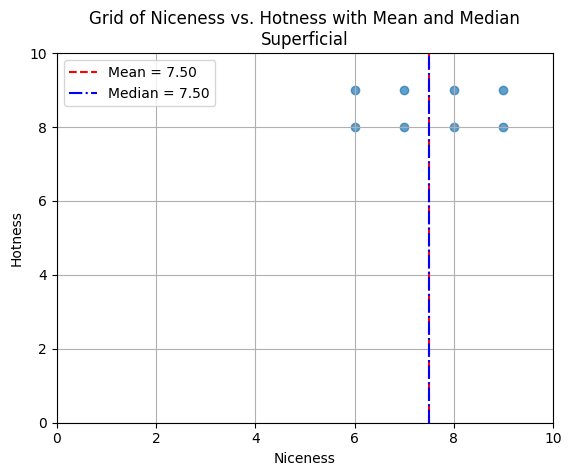

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def filter_above_threshold(df, threshold=7):
    """
    Filters the DataFrame to keep points where 'niceness' is above a given threshold.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'hotness' and 'niceness' columns.
        threshold (float): Threshold for filtering 'niceness'.

    Returns:
        pd.DataFrame: Filtered DataFrame with points above the threshold.
    """
    return df[df['hotness'] > threshold]


# Filter the DataFrame
superficial_df = filter_above_threshold(df, threshold=7)

# Calculate mean and median of the 'niceness' column
mean_niceness = superficial_df['niceness'].mean()
median_niceness = superficial_df['niceness'].median()

# Create the scatter plot with switched axes
plt.scatter(superficial_df['niceness'], superficial_df['hotness'], alpha=0.7)
plt.axvline(mean_niceness, color='red', linestyle='--', label=f'Mean = {mean_niceness:.2f}')
plt.axvline(median_niceness, color='blue', linestyle='-.', label=f'Median = {median_niceness:.2f}')
plt.xlabel('Niceness')
plt.ylabel('Hotness')
plt.title('Grid of Niceness vs. Hotness with Mean and Median\nSuperficial')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()
